# PREDICTION OF DELAMINATION FACTOR LEVELS USING VARIOUS CLASSIFICATION MODELS

# LOADING DATA SET

In [1]:
#importing PANDAS library
import pandas as pd
df = pd.read_csv('C:/Users/hp/Documents/mini_project_data.csv')
# defining the ranges for the three levels
ranges = [1.0006, 1.03, 1.07]

# defining the labels for the three levels
labels = ['Best','Worst']

# use the cut function to create a new column with the delamination factor levels
df['delamination level'] = pd.cut(df['Delamination Factor'], ranges,labels=labels)
#using delete function to delete the delamination factor column
del df['Delamination Factor']
# save the updated data to a new csv file
df.to_csv('data_with_levels.csv', index=False)

In [2]:
df

,cutting speed,depth of cut,feed rate,delamination level
0,50,0.05,0.04,Best
1,50,0.05,0.05,Best
2,50,0.05,0.06,Best
3,50,0.05,0.07,Best
4,50,0.05,0.08,Best
...,...,...,...,...
724,100,0.25,0.08,Worst
725,100,0.25,0.09,Worst
726,100,0.25,0.10,Worst
727,100,0.25,0.11,Worst


# Explotary data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   cutting speed       729 non-null    int64   
 1   depth of cut        729 non-null    float64 
 2   feed rate           729 non-null    float64 
 3   delamination level  729 non-null    category
dtypes: category(1), float64(2), int64(1)
memory usage: 18.0 KB


In [4]:
df.describe()

,cutting speed,depth of cut,feed rate
count,729.00000,729.000000,729.000000
mean,75.00000,0.150000,0.080000
std,16.10798,0.064594,0.025838
min,50.00000,0.050000,0.040000
25%,63.00000,0.100000,0.060000
50%,75.00000,0.150000,0.080000
75%,87.00000,0.200000,0.100000
max,100.00000,0.250000,0.120000


In [5]:
import seaborn as sns

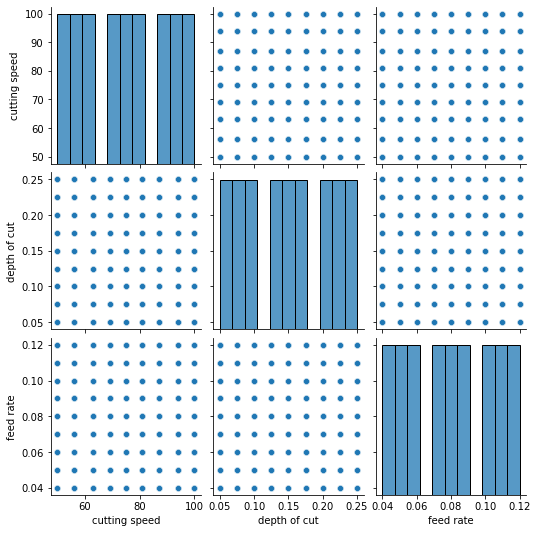

In [6]:
sns.pairplot(df)

<AxesSubplot:>

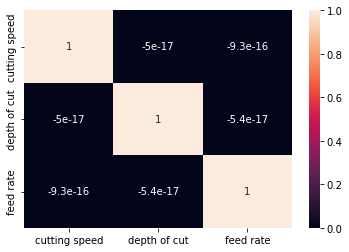

In [7]:
sns.heatmap(df.corr(), annot=True)

# Defining x and y

In [8]:
x= df.iloc[:, [0,1,2]]
y=df.iloc[:, 3]

In [9]:
x

,cutting speed,depth of cut,feed rate
0,50,0.05,0.04
1,50,0.05,0.05
2,50,0.05,0.06
3,50,0.05,0.07
4,50,0.05,0.08
...,...,...,...
724,100,0.25,0.08
725,100,0.25,0.09
726,100,0.25,0.10
727,100,0.25,0.11


In [10]:
y

0       Best
1       Best
2       Best
3       Best
4       Best
       ...  
724    Worst
725    Worst
726    Worst
727    Worst
728    Worst
Name: delamination level, Length: 729, dtype: category
Categories (2, object): ['Best' < 'Worst']

# IMPORTING REQUIRED LIBRARIES

In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
X_test

,cutting speed,depth of cut,feed rate
468,81,0.225,0.04
148,56,0.225,0.08
302,69,0.200,0.09
355,75,0.125,0.08
515,87,0.125,0.06
...,...,...,...
332,75,0.050,0.12
532,87,0.175,0.05
558,87,0.250,0.04
137,56,0.200,0.06


In [14]:
y_test

468     Best
148     Best
302    Worst
355     Best
515     Best
       ...  
332    Worst
532     Best
558     Best
137     Best
314    Worst
Name: delamination level, Length: 219, dtype: category
Categories (2, object): ['Best' < 'Worst']

# Standardize the data

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Transforming the target column from categorical to numerical

In [16]:
df['delamination level'].replace(['Best', 'Worst'],[0, 1], inplace=True)

# Visualizations

In [17]:
df['delamination level'].value_counts()

1    382
0    347
Name: delamination level, dtype: int64

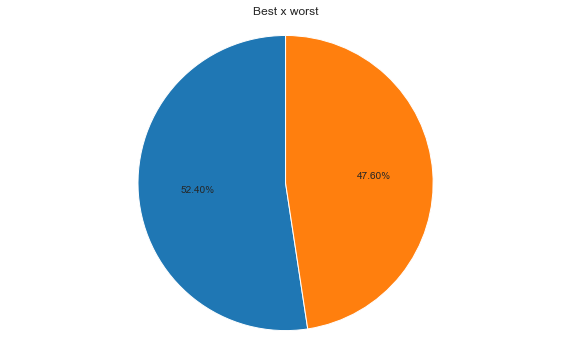

In [18]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.pie(df['delamination level'].value_counts(),autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title("Best x worst")
plt.show()

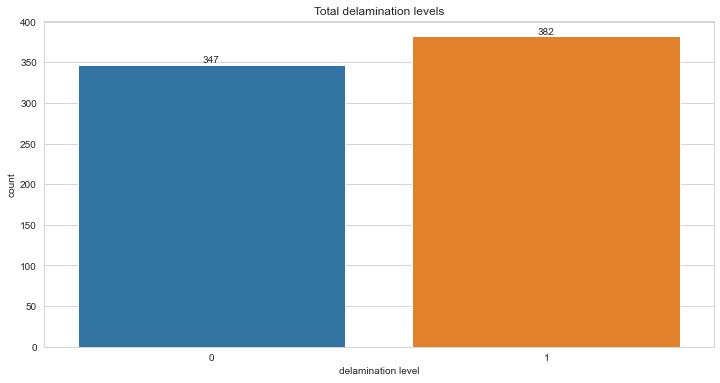

In [19]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='delamination level')
plt.title('Total delamination levels')

ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

# Model 1:Logistic Regression

Train Score is:  0.984313725490196
Test Score is :  0.9634703196347032
    y_test y_predict  Match
468   Best      Best   True
148   Best      Best   True
302  Worst     Worst   True
355   Best     Worst  False
515   Best      Best   True
..     ...       ...    ...
332  Worst     Worst   True
532   Best      Best   True
558   Best      Best   True
137   Best      Best   True
314  Worst     Worst   True

[219 rows x 3 columns]
Predicted correctly is:  211 out of 219
Accuracy Score is: 0.9634703196347032
Precision Score is: 0.9642325025080867
Recall Score is: 0.9634703196347032
F1 Score is: 0.9635286443344462
              precision    recall  f1-score   support

        Best       0.98      0.95      0.97       121
       Worst       0.94      0.98      0.96        98

    accuracy                           0.96       219
   macro avg       0.96      0.97      0.96       219
weighted avg       0.96      0.96      0.96       219



Best     117
Worst    102
dtype: int64

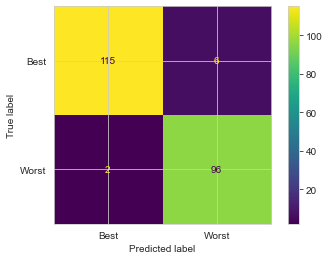

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)
predictions1 = logreg.predict(X_test_std)

print('Train Score is: ' , logreg.score(X_train_std, y_train))

print('Test Score is : ' , logreg.score(X_test_std, y_test))

print(pd.DataFrame({"y_test":y_test,'y_predict':predictions1,'Match':y_test == predictions1}).head(X_test_std.shape[0]))

#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test,predictions1, normalize=False)

print('Predicted correctly is: ', AccScore,'out of',X_test_std.shape[0])

# Computing Metrics
acc_score = accuracy_score(y_test, predictions1)
precision = precision_score(y_test, predictions1, average='weighted')
recall = recall_score(y_test, predictions1, average='weighted')
f1score = f1_score(y_test, predictions1, average='weighted')

# Printing Metrics
print('Accuracy Score is:', acc_score)
print('Precision Score is:', precision)
print('Recall Score is:', recall)
print('F1 Score is:', f1score)


print(classification_report(y_test,predictions1))

cm = confusion_matrix(y_test,predictions1, labels=['Best','Worst'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Best', 'Worst'])
disp.plot()

pd.value_counts(predictions1)

In [21]:
y_lrpred= logreg.predict([[-1.20469962, -1.54798117, -0.41339627]])
y_lrpred

array(['Best'], dtype=object)

In [22]:
X_test_std

array([[ 0.33029761,  1.12846948, -1.5918642 ],
       [-1.21230113,  1.12846948, -0.04326956],
       [-0.41014979,  0.7470782 ,  0.34387911],
       [-0.03992609, -0.39709562, -0.04326956],
       [ 0.70052131, -0.39709562, -0.81756688],
       [-0.41014979, -0.7784869 ,  0.34387911],
       [-1.58252483,  1.50986075, -1.5918642 ],
       [-1.21230113, -1.54126944, -1.5918642 ],
       [-1.21230113,  0.36568693,  1.11817643],
       [-0.03992609, -0.7784869 , -1.5918642 ],
       [-0.03992609, -0.7784869 , -0.81756688],
       [ 1.50267266,  0.7470782 ,  1.11817643],
       [-1.58252483,  1.50986075,  0.73102777],
       [ 0.33029761, -0.39709562, -1.20471554],
       [-0.78037348, -0.01570435,  0.73102777],
       [-1.21230113, -1.54126944,  0.34387911],
       [ 0.33029761,  0.7470782 ,  0.34387911],
       [-1.58252483, -0.39709562,  0.73102777],
       [ 1.13244896, -0.7784869 , -0.81756688],
       [-1.21230113, -0.01570435, -1.20471554],
       [-0.03992609,  0.7470782 , -0.043

In [23]:
y_test

468     Best
148     Best
302    Worst
355     Best
515     Best
       ...  
332    Worst
532     Best
558     Best
137     Best
314    Worst
Name: delamination level, Length: 219, dtype: category
Categories (2, object): ['Best' < 'Worst']

# Model 2:K-Nearest Neighbors

Train Score is:  0.984313725490196
Test Score is :  0.9771689497716894
    y_test y_predict  Match
468   Best      Best   True
148   Best      Best   True
302  Worst     Worst   True
355   Best      Best   True
515   Best      Best   True
..     ...       ...    ...
332  Worst     Worst   True
532   Best      Best   True
558   Best      Best   True
137   Best      Best   True
314  Worst     Worst   True

[219 rows x 3 columns]
Predicted correctly  is:  214 out of 219
Accuracy Score is: 0.9771689497716894
Precision Score is: 0.9775953796912081
Recall Score is: 0.9771689497716894
F1 Score is: 0.9771977520048994
              precision    recall  f1-score   support

        Best       0.99      0.97      0.98       121
       Worst       0.96      0.99      0.97        98

    accuracy                           0.98       219
   macro avg       0.98      0.98      0.98       219
weighted avg       0.98      0.98      0.98       219



Best     118
Worst    101
dtype: int64

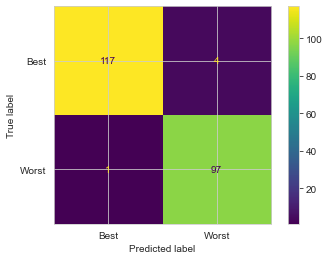

In [24]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_std, y_train)
predictions2 = knn.predict(X_test_std)
print('Train Score is: ' , knn.score(X_train_std, y_train))
print('Test Score is : ' , knn.score(X_test_std, y_test))
print(pd.DataFrame({"y_test":y_test,'y_predict':predictions2,'Match':y_test == predictions2}).head(X_test_std.shape[0]))

#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test,predictions2, normalize=False)
print('Predicted correctly  is: ', AccScore,'out of',X_test_std.shape[0])
# Computing Metrics
acc_score = accuracy_score(y_test, predictions2)
precision = precision_score(y_test, predictions2, average='weighted')
recall = recall_score(y_test, predictions2, average='weighted')
f1score = f1_score(y_test, predictions2, average='weighted')

# Printing Metrics
print('Accuracy Score is:', acc_score)
print('Precision Score is:', precision)
print('Recall Score is:', recall)
print('F1 Score is:', f1score)


print(classification_report(y_test,predictions2))

cm = confusion_matrix(y_test,predictions2, labels=['Best','Worst'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Best', 'Worst'])
disp.plot()

pd.value_counts(predictions2)


# Sample check

In [25]:
check_predictions2 = knn.predict(X_test_std)

In [26]:
#468[81,0.225,0.04]
check_predictions2=knn.predict([[0.33029761,  1.12846948, -1.5918642]])
check_predictions2

array(['Best'], dtype=object)

In [27]:
#302 [69,0.200,0.09]
check_predictions2=knn.predict([[-0.41014979,  0.7470782 ,  0.34387911]])
check_predictions2

array(['Worst'], dtype=object)

# Model 3:Random Forest

Train Score is:  1.0
Test Score is :  0.9634703196347032
    y_test y_predict  Match
468   Best      Best   True
148   Best      Best   True
302  Worst     Worst   True
355   Best     Worst  False
515   Best      Best   True
..     ...       ...    ...
332  Worst     Worst   True
532   Best      Best   True
558   Best      Best   True
137   Best      Best   True
314  Worst     Worst   True

[219 rows x 3 columns]
Predicted correctly is:  211 out of 219
Accuracy Score is: 0.9634703196347032
Precision Score is: 0.965076128953437
Recall Score is: 0.9634703196347032
F1 Score is: 0.9635484792965018
              precision    recall  f1-score   support

        Best       0.99      0.94      0.97       121
       Worst       0.93      0.99      0.96        98

    accuracy                           0.96       219
   macro avg       0.96      0.97      0.96       219
weighted avg       0.97      0.96      0.96       219



Best     115
Worst    104
dtype: int64

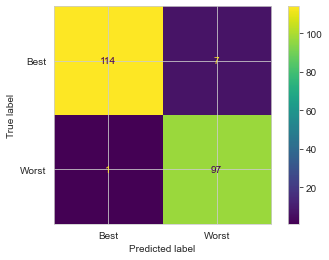

In [28]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train_std, y_train)
predictions3 = rfc.predict(X_test_std)
print('Train Score is: ' , rfc.score(X_train_std, y_train))
print('Test Score is : ' , rfc.score(X_test_std, y_test))

print(pd.DataFrame({"y_test":y_test,'y_predict':predictions3,'Match':y_test == predictions3}).head(X_test_std.shape[0]))

#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test,predictions3, normalize=False)
print('Predicted correctly is: ', AccScore,'out of',X_test_std.shape[0])
# Computing Metrics
acc_score = accuracy_score(y_test, predictions3)
precision = precision_score(y_test, predictions3, average='weighted')
recall = recall_score(y_test, predictions3, average='weighted')
f1score = f1_score(y_test, predictions3, average='weighted')

# Printing Metrics
print('Accuracy Score is:', acc_score)
print('Precision Score is:', precision)
print('Recall Score is:', recall)
print('F1 Score is:', f1score)


print(classification_report(y_test,predictions3))

cm = confusion_matrix(y_test,predictions3, labels=['Best','Worst'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Best', 'Worst'])
disp.plot()

pd.value_counts(predictions3)

# Model 4:Support Vector Machine

Train Score is:  0.9823529411764705
Test Score is :  0.9680365296803652
    y_test y_predict  Match
468   Best      Best   True
148   Best      Best   True
302  Worst     Worst   True
355   Best     Worst  False
515   Best      Best   True
..     ...       ...    ...
332  Worst     Worst   True
532   Best      Best   True
558   Best      Best   True
137   Best      Best   True
314  Worst     Worst   True

[219 rows x 3 columns]
Predicted correctly is:  212 out of 219
Accuracy Score is: 0.9680365296803652
Precision Score is: 0.969169674372815
Recall Score is: 0.9680365296803652
F1 Score is: 0.9680969178729208
              precision    recall  f1-score   support

        Best       0.99      0.95      0.97       121
       Worst       0.94      0.99      0.97        98

    accuracy                           0.97       219
   macro avg       0.97      0.97      0.97       219
weighted avg       0.97      0.97      0.97       219



Best     116
Worst    103
dtype: int64

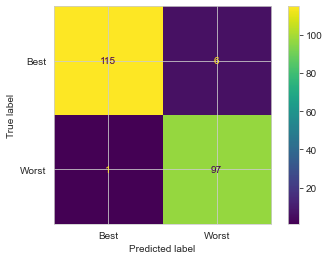

In [29]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_std, y_train)
predictions4 = svc_model.predict(X_test_std)

print('Train Score is: ' , svc_model.score(X_train_std, y_train))
print('Test Score is : ' , svc_model.score(X_test_std, y_test))

print(pd.DataFrame({"y_test":y_test,'y_predict':predictions4,'Match':y_test == predictions4}).head(X_test_std.shape[0]))

#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test,predictions4, normalize=False)
print('Predicted correctly is: ', AccScore,'out of',X_test_std.shape[0])
# Computing Metrics
acc_score = accuracy_score(y_test, predictions4)
precision = precision_score(y_test, predictions4, average='weighted')
recall = recall_score(y_test, predictions4, average='weighted')
f1score = f1_score(y_test, predictions4, average='weighted')

# Printing Metrics
print('Accuracy Score is:', acc_score)
print('Precision Score is:', precision)
print('Recall Score is:', recall)
print('F1 Score is:', f1score)


print(classification_report(y_test,predictions4))

cm = confusion_matrix(y_test,predictions4, labels=['Best','Worst'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Best', 'Worst'])
disp.plot()

pd.value_counts(predictions4)


# Model 5:Decision Tree classification

Train Score is:  1.0
Test Score is :  0.9726027397260274
    y_test y_predict  Match
468   Best      Best   True
148   Best      Best   True
302  Worst     Worst   True
355   Best     Worst  False
515   Best      Best   True
..     ...       ...    ...
332  Worst     Worst   True
532   Best      Best   True
558   Best      Best   True
137   Best      Best   True
314  Worst     Worst   True

[219 rows x 3 columns]
Predicted correctly is:  213 out of 219
Accuracy Score is: 0.9726027397260274
Precision Score is: 0.9733419652839475
Recall Score is: 0.9726027397260274
F1 Score is: 0.9726464832508347
              precision    recall  f1-score   support

        Best       0.99      0.96      0.97       121
       Worst       0.95      0.99      0.97        98

    accuracy                           0.97       219
   macro avg       0.97      0.97      0.97       219
weighted avg       0.97      0.97      0.97       219



Best     117
Worst    102
dtype: int64

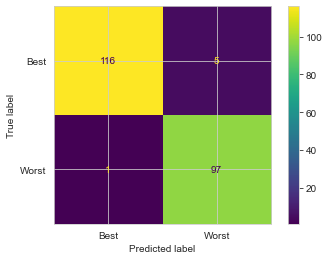

In [30]:
dtc_model = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=42)
dtc_model.fit(X_train_std, y_train)
predictions5 =dtc_model.predict(X_test_std)

print('Train Score is: ' , dtc_model.score(X_train_std, y_train))
print('Test Score is : ' , dtc_model.score(X_test_std, y_test))

print(pd.DataFrame({"y_test":y_test,'y_predict':predictions5,'Match':y_test == predictions5}).head(X_test_std.shape[0]))

#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test,predictions5, normalize=False)
print('Predicted correctly is: ', AccScore,'out of',X_test_std.shape[0])
# Computing Metrics
acc_score = accuracy_score(y_test, predictions5)
precision = precision_score(y_test, predictions5, average='weighted')
recall = recall_score(y_test, predictions5, average='weighted')
f1score = f1_score(y_test, predictions5, average='weighted')

# Printing Metrics
print('Accuracy Score is:', acc_score)
print('Precision Score is:', precision)
print('Recall Score is:', recall)
print('F1 Score is:', f1score)


print(classification_report(y_test,predictions5))

cm = confusion_matrix(y_test,predictions5, labels=['Best','Worst'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Best', 'Worst'])
disp.plot()

pd.value_counts(predictions5)


# Model 6:Gradient Boosting Classification

Train Score is:  1.0
Test Score is :  0.9726027397260274
    y_test y_predict  Match
468   Best      Best   True
148   Best      Best   True
302  Worst     Worst   True
355   Best     Worst  False
515   Best      Best   True
..     ...       ...    ...
332  Worst     Worst   True
532   Best      Best   True
558   Best      Best   True
137   Best      Best   True
314  Worst     Worst   True

[219 rows x 3 columns]
Predicted correctly is:  213 out of 219
Accuracy Score is: 0.9726027397260274
Precision Score is: 0.9733419652839475
Recall Score is: 0.9726027397260274
F1 Score is: 0.9726464832508347
              precision    recall  f1-score   support

        Best       0.99      0.96      0.97       121
       Worst       0.95      0.99      0.97        98

    accuracy                           0.97       219
   macro avg       0.97      0.97      0.97       219
weighted avg       0.97      0.97      0.97       219



Best     117
Worst    102
dtype: int64

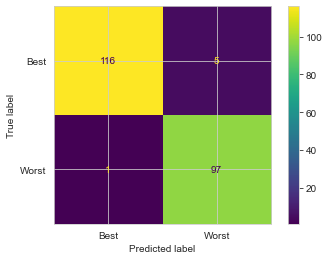

In [31]:
gbc_model = GradientBoostingClassifier(n_estimators=500,max_depth=100,random_state=33) 
gbc_model.fit(X_train_std, y_train)
predictions6 =gbc_model.predict(X_test_std)

print('Train Score is: ' , gbc_model.score(X_train_std, y_train))
print('Test Score is : ' , gbc_model.score(X_test_std, y_test))

print(pd.DataFrame({"y_test":y_test,'y_predict':predictions6,'Match':y_test == predictions6}).head(X_test_std.shape[0]))

#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test,predictions6, normalize=False)
print('Predicted correctly is: ', AccScore,'out of',X_test_std.shape[0])
# Computing Metrics
acc_score = accuracy_score(y_test, predictions6)
precision = precision_score(y_test, predictions6, average='weighted')
recall = recall_score(y_test, predictions6, average='weighted')
f1score = f1_score(y_test, predictions6, average='weighted')

# Printing Metrics
print('Accuracy Score is:', acc_score)
print('Precision Score is:', precision)
print('Recall Score is:', recall)
print('F1 Score is:', f1score)

print(classification_report(y_test,predictions6))

cm = confusion_matrix(y_test,predictions6, labels=['Best','Worst'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Best', 'Worst'])
disp.plot()

pd.value_counts(predictions6)


# Model 7:Linear Discriminant Analysis

Train Score is:  0.9764705882352941
Test Score is :  0.954337899543379
Predicted Value for LDA: 
    y_test y_predict  Match
468   Best      Best   True
148   Best      Best   True
302  Worst     Worst   True
355   Best     Worst  False
515   Best      Best   True
..     ...       ...    ...
332  Worst     Worst   True
532   Best      Best   True
558   Best      Best   True
137   Best      Best   True
314  Worst     Worst   True

[219 rows x 3 columns]
Predicted correctly is:  209 out of 219
Accuracy Score is: 0.954337899543379
Precision Score is: 0.9559689070111941
Recall Score is: 0.954337899543379
F1 Score is: 0.9544355991206274
              precision    recall  f1-score   support

        Best       0.98      0.93      0.96       121
       Worst       0.92      0.98      0.95        98

    accuracy                           0.95       219
   macro avg       0.95      0.96      0.95       219
weighted avg       0.96      0.95      0.95       219



Best     115
Worst    104
dtype: int64

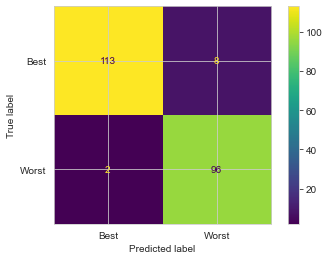

In [32]:
lda_model = LinearDiscriminantAnalysis(n_components=1,solver='svd',tol=0.0001)
lda_model.fit(X_train_std, y_train)
predictions7 =lda_model.predict(X_test_std)
probas = lda_model.predict_proba(X_test_std)
print('Train Score is: ' , lda_model.score(X_train_std, y_train))
print('Test Score is : ' , lda_model.score(X_test_std, y_test))
print('Predicted Value for LDA: ')
print(pd.DataFrame({"y_test":y_test,'y_predict':predictions7,'Match':y_test ==predictions7 }).head(X_test_std.shape[0]))

#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test,predictions7, normalize=False)
print('Predicted correctly is: ', AccScore,'out of',X_test_std.shape[0])
# Computing Metrics
acc_score = accuracy_score(y_test, predictions7)
precision = precision_score(y_test, predictions7, average='weighted')
recall = recall_score(y_test, predictions7, average='weighted')
f1score = f1_score(y_test, predictions7, average='weighted')

# Printing Metrics
print('Accuracy Score is:', acc_score)
print('Precision Score is:', precision)
print('Recall Score is:', recall)
print('F1 Score is:', f1score)
print(classification_report(y_test, predictions7))


cm = confusion_matrix(y_test,predictions7, labels=['Best','Worst'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Best', 'Worst'])
disp.plot()

pd.value_counts(predictions7)



# Model 8:Quadratic Discriminant Analysis

Train Score is:  0.9725490196078431
Test Score is :  0.958904109589041
Predicted Value for QDA: 
    y_test y_predict  Match
468   Best      Best   True
148   Best      Best   True
302  Worst     Worst   True
355   Best     Worst  False
515   Best      Best   True
..     ...       ...    ...
332  Worst     Worst   True
532   Best      Best   True
558   Best      Best   True
137   Best      Best   True
314  Worst     Worst   True

[219 rows x 3 columns]
Predicted correctly is:  210 out of 219
Accuracy Score is: 0.954337899543379
Precision Score is: 0.9559689070111941
Recall Score is: 0.954337899543379
F1 Score is: 0.9544355991206274
              precision    recall  f1-score   support

        Best       0.99      0.93      0.96       121
       Worst       0.92      0.99      0.96        98

    accuracy                           0.96       219
   macro avg       0.96      0.96      0.96       219
weighted avg       0.96      0.96      0.96       219



Best     114
Worst    105
dtype: int64

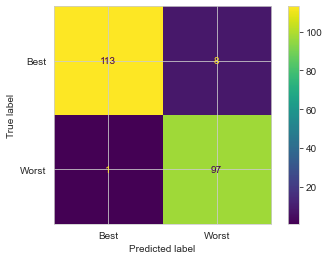

In [33]:
qda_model = QuadraticDiscriminantAnalysis(tol=0.0001)
qda_model.fit(X_train_std, y_train)
predictions8 =qda_model.predict(X_test_std)
probas = qda_model.predict_proba(X_test_std)

print('Train Score is: ' , qda_model.score(X_train_std, y_train))
print('Test Score is : ' , qda_model.score(X_test_std, y_test))
print('Predicted Value for QDA: ')
print(pd.DataFrame({"y_test":y_test,'y_predict':predictions8,'Match':y_test ==predictions8}).head(X_test_std.shape[0]))

#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test,predictions8, normalize=False)
print('Predicted correctly is: ', AccScore,'out of',X_test_std.shape[0])
# Computing Metrics
acc_score = accuracy_score(y_test, predictions7)
precision = precision_score(y_test, predictions7, average='weighted')
recall = recall_score(y_test, predictions7, average='weighted')
f1score = f1_score(y_test, predictions7, average='weighted')

# Printing Metrics
print('Accuracy Score is:', acc_score)
print('Precision Score is:', precision)
print('Recall Score is:', recall)
print('F1 Score is:', f1score)

print(classification_report(y_test,predictions8))

cm = confusion_matrix(y_test,predictions8, labels=['Best','Worst'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Best', 'Worst'])
disp.plot()

pd.value_counts(predictions8)


# Tabulating the accuracies of different models

In [34]:
# create a list of model names
model_names = ["Logistic Regression", "K-Nearest Neighbors", "Random Forest", "Support Vector Machine", "Decision Tree classification", "Gradient Boosting Classification", "Linear Discriminant Analysis",'Quadratic Discriminant Analysis']

# create a list of accuracy scores for each model
accuracy_scores = [0.9634703196347032,0.9771689497716894,0.9680365296803652,0.9680365296803652,0.9726027397260274,0.9726027397260274,0.954337899543379,0.954337899543379]
precission_scores=[0.9642325025080867,0.9775953796912081,0.969169674372815,0.969169674372815,0.9733419652839475,0.9733419652839475,0.9559689070111941,0.9559689070111941]
recall_scores=[0.9634703196347032,0.9771689497716894,0.9680365296803652,0.9680365296803652,0.9726027397260274,0.9726027397260274,0.954337899543379,0.954337899543379]
f1scores=[0.9635286443344462,0.9771977520048994,0.9680969178729208,0.9680969178729208,0.9726464832508347,0.9726464832508347,0.9544355991206274,0.9544355991206274]

# create a dictionary to store the model names and accuracy scores
data = {"Model": model_names, "Accuracy Score": accuracy_scores,"Precission Score":precission_scores,'Recall Score':recall_scores,"F1 Score":f1scores}

# create a pandas DataFrame using the dictionary
accuracy_df = pd.DataFrame(data)

# display the DataFrame
accuracy_df

,Model,Accuracy Score,Precission Score,Recall Score,F1 Score
0,Logistic Regression,0.963470,0.964233,0.963470,0.963529
1,K-Nearest Neighbors,0.977169,0.977595,0.977169,0.977198
2,Random Forest,0.968037,0.969170,0.968037,0.968097
3,Support Vector Machine,0.968037,0.969170,0.968037,0.968097
4,Decision Tree classification,0.972603,0.973342,0.972603,0.972646
5,Gradient Boosting Classification,0.972603,0.973342,0.972603,0.972646
6,Linear Discriminant Analysis,0.954338,0.955969,0.954338,0.954436
7,Quadratic Discriminant Analysis,0.954338,0.955969,0.954338,0.954436


# Arranging the accuracies in descending order

In [35]:
accuracy_df=accuracy_df.sort_values('Accuracy Score',ascending=False)
accuracy_df

,Model,Accuracy Score,Precission Score,Recall Score,F1 Score
1,K-Nearest Neighbors,0.977169,0.977595,0.977169,0.977198
4,Decision Tree classification,0.972603,0.973342,0.972603,0.972646
5,Gradient Boosting Classification,0.972603,0.973342,0.972603,0.972646
2,Random Forest,0.968037,0.969170,0.968037,0.968097
3,Support Vector Machine,0.968037,0.969170,0.968037,0.968097
0,Logistic Regression,0.963470,0.964233,0.963470,0.963529
6,Linear Discriminant Analysis,0.954338,0.955969,0.954338,0.954436
7,Quadratic Discriminant Analysis,0.954338,0.955969,0.954338,0.954436


In [36]:
accuracy_df=accuracy_df.sort_values('Precission Score',ascending=False)
accuracy_df

,Model,Accuracy Score,Precission Score,Recall Score,F1 Score
1,K-Nearest Neighbors,0.977169,0.977595,0.977169,0.977198
4,Decision Tree classification,0.972603,0.973342,0.972603,0.972646
5,Gradient Boosting Classification,0.972603,0.973342,0.972603,0.972646
2,Random Forest,0.968037,0.969170,0.968037,0.968097
3,Support Vector Machine,0.968037,0.969170,0.968037,0.968097
0,Logistic Regression,0.963470,0.964233,0.963470,0.963529
6,Linear Discriminant Analysis,0.954338,0.955969,0.954338,0.954436
7,Quadratic Discriminant Analysis,0.954338,0.955969,0.954338,0.954436


In [37]:
accuracy_df=accuracy_df.sort_values('Recall Score',ascending=False)
accuracy_df

,Model,Accuracy Score,Precission Score,Recall Score,F1 Score
1,K-Nearest Neighbors,0.977169,0.977595,0.977169,0.977198
4,Decision Tree classification,0.972603,0.973342,0.972603,0.972646
5,Gradient Boosting Classification,0.972603,0.973342,0.972603,0.972646
2,Random Forest,0.968037,0.969170,0.968037,0.968097
3,Support Vector Machine,0.968037,0.969170,0.968037,0.968097
0,Logistic Regression,0.963470,0.964233,0.963470,0.963529
6,Linear Discriminant Analysis,0.954338,0.955969,0.954338,0.954436
7,Quadratic Discriminant Analysis,0.954338,0.955969,0.954338,0.954436


In [38]:
accuracy_df=accuracy_df.sort_values('F1 Score',ascending=False)
accuracy_df

,Model,Accuracy Score,Precission Score,Recall Score,F1 Score
1,K-Nearest Neighbors,0.977169,0.977595,0.977169,0.977198
4,Decision Tree classification,0.972603,0.973342,0.972603,0.972646
5,Gradient Boosting Classification,0.972603,0.973342,0.972603,0.972646
2,Random Forest,0.968037,0.969170,0.968037,0.968097
3,Support Vector Machine,0.968037,0.969170,0.968037,0.968097
0,Logistic Regression,0.963470,0.964233,0.963470,0.963529
6,Linear Discriminant Analysis,0.954338,0.955969,0.954338,0.954436
7,Quadratic Discriminant Analysis,0.954338,0.955969,0.954338,0.954436
